In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
train_df = pd.read_csv("train.csv")
train_df

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,...,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,...,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004


In [2]:
#REF有空值，即没有雷达数据，把这些样本删除
good_ids = set(train_df.loc[train_df['Ref'].notna(), 'Id'])
train_df = train_df[train_df['Id'].isin(good_ids)]
#发现其他列也有很多空值，把空值用0代替
train_df.fillna(0,inplace=True)
train_df.shape

/home/ubuntu/miniconda3/envs/env1/lib/python3.6/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


(9125329, 24)

In [3]:
train_df

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
6,2,1,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016000
7,2,6,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,...,1.005000,0.0625,-0.1875,0.2500,0.6875,0.000000,0.000000,0.000000,1.409988,1.016000
8,2,11,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,...,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,0.000000,-0.350006,1.759994,1.016000
9,2,16,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016000
10,2,21,2.0,24.5,16.5,21.0,24.5,24.5,21.0,24.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,...,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,8.636004
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,...,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,8.636004
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,...,1.051667,1.7500,0.0000,0.7500,3.0000,13.379990,0.000000,0.000000,13.379990,8.636004
13765199,1180945,52,9.0,19.0,0.0,15.5,26.5,19.0,0.0,16.5,...,1.051667,0.0000,0.0000,0.0000,2.8125,0.000000,0.000000,0.000000,0.000000,8.636004


In [4]:
#看到第一列的索引还是原来的索引，需要重新排列
train_df.reset_index(drop=True, inplace=True)
train_df.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,2,1,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
1,2,6,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,...,1.005000,0.0625,-0.1875,0.2500,0.6875,0.000000,0.000000,0.000000,1.409988,1.016
2,2,11,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,...,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,0.000000,-0.350006,1.759994,1.016
3,2,16,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
4,2,21,2.0,24.5,16.5,21.0,24.5,24.5,21.0,24.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016


In [5]:
#看一看['Expected']的情况
train_df['Expected'].describe()

count    9.125329e+06
mean     2.243151e+01
std      2.335856e+02
min      1.000000e-02
25%      3.500002e-01
50%      1.270001e+00
75%      3.556002e+00
max      3.301773e+04
Name: Expected, dtype: float64

发现Expected的平均值为22.4，75%的数据都在3.55以下，而最大值为33017，说明有异常值，需要被剔除

In [6]:
from scipy import stats
print(stats.percentileofscore(train_df["Expected"],70))

97.68606699002305


In [7]:
#把Expected小于70的行都剔除
train_df = train_df[train_df['Expected'] < 70]
train_df.shape

(8914175, 24)

In [8]:
#构造x_train,y_train
train_groups = train_df.groupby("Id")#ID相同的为一组
train_size = len(train_groups)#组数
MAX_SEQ_LEN = train_groups.size().max()
MAX_SEQ_LEN#最长一组的行数

19

In [9]:
#构造空矩阵
x_train = np.zeros((train_size, MAX_SEQ_LEN, 22), dtype=np.float32)#特征数为22
y_train = np.zeros(train_size, dtype=np.float32)

i = 0
for _, group in train_groups:
    X = group.values
    seq_len = X.shape[0]
    x_train[i,:seq_len,:] = X[:,1:23]
    y_train[i] = X[0,23]
    i += 1
    del X
    
del train_groups
x_train.shape, y_train.shape

((713894, 19, 22), (713894,))

In [11]:
#构造x_test,y_test
test_df = pd.read_csv("test.csv")
test_df[test_df.columns[1:]] = test_df[test_df.columns[1:]].astype(np.float32)
test_ids = test_df['Id'].unique()
# 空值改为0
test_df = test_df.fillna(0.0)
test_df = test_df.reset_index(drop=True)
test_df.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,1,1.0,8.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5.0,8.0,10.0,0.0,10.0,18.0,11.5,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8.0,8.0,0.0,0.0,7.0,14.5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,12.0,8.0,14.0,0.0,9.0,16.0,14.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,15.0,8.0,10.5,0.0,9.0,15.5,13.5,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#与x_train，y_train相同的流程
test_groups = test_df.groupby("Id")
test_size = len(test_groups)
X_test = np.zeros((test_size, MAX_SEQ_LEN, 22), dtype=np.float32)
i = 0
for _, group in test_groups:
    X = group.values
    seq_len = X.shape[0]
    X_test[i,:seq_len,:] = X[:,1:23]
    i += 1
    del X
    
del test_groups
X_test.shape

(717625, 19, 22)

In [13]:
from keras.layers import (Input, Dense, LSTM, Flatten, Bidirectional, Dropout)
from keras.models import Model

In [14]:
def get_model_deep(shape=(19, 22)):
    inp = Input(shape)
    x = Dense(16)(inp)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
#    x = TimeDistributed(Dense(64))(x)
#    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    #x = TimeDistributed(Dense(1))(x)
    #x = AveragePooling1D()(x)
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)

    model = Model(inp, x)
    return model

In [15]:
model = get_model_deep((19,22))
model.compile(optimizer='adam', loss='mae',)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 22)]          0         
_________________________________________________________________
dense (Dense)                (None, 19, 16)            368       
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 128)           41472     
_________________________________________________________________
flatten (Flatten)            (None, 2432)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2432)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2433      
Total params: 44,273
Trainable params: 44,273
Non-trainable params: 0
_________________________________________________________

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_delta=0.01)
history=model.fit(x_train, y_train, 
            batch_size=1024, epochs=20, 
            validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
558/558 [==============================] - 466s 836ms/step - loss: 2.3899 - val_loss: 2.3978 - lr: 0.0010
Epoch 2/20
558/558 [==============================] - 470s 843ms/step - loss: 2.2933 - val_loss: 2.3769 - lr: 0.0010
Epoch 3/20
558/558 [==============================] - 478s 856ms/step - loss: 2.2754 - val_loss: 2.3488 - lr: 0.0010
Epoch 4/20
558/558 [==============================] - 441s 791ms/step - loss: 2.2663 - val_loss: 2.3424 - lr: 0.0010
Epoch 5/20
558/558 [==============================] - 440s 788ms/step - loss: 2.2562 - val_loss: 2.3393 - lr: 0.0010
Epoch 6/20
558/558 [==============================] - 411s 737ms/step - loss: 2.2504 - val_loss: 2.3448 - lr: 0.0010
Epoch 7/20
558/558 [==============================] - 433s 776ms/step - loss: 2.2291 - val_loss: 2.3276 - lr: 1.0000e-04
Epoch 8/20
558/558 [==============================] - 417s 747ms/step - loss: 2.2256 - val_loss: 2.3283 - lr: 1.0000e-04
Epoch 9/20
558/558 [==============================] - 36

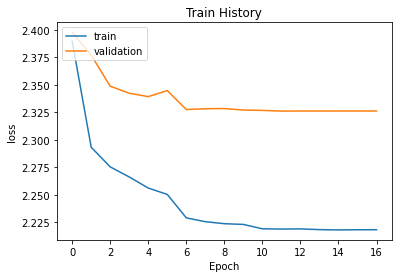

In [17]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(history,'loss','val_loss')

In [18]:
y_pred = model.predict(X_test, batch_size=1024)
submission = pd.DataFrame({'Id': test_ids, 'Expected': y_pred.reshape(-1)})

In [19]:
y_pred = model.predict(X_test, batch_size=1024)
submission = pd.DataFrame({'Id': test_ids, 'Expected': y_pred.reshape(-1)})
submission.to_csv('submission.csv', index=False)
submission

,Id,Expected
0,1,0.394387
1,2,0.572887
2,3,2.253579
3,4,4.651532
4,5,0.629919
...,...,...
717620,717621,0.465277
717621,717622,0.500273
717622,717623,1.106612
717623,717624,1.290712
